# Phase E: Optimization & Simulation

## Objective
Transition from 'what happened' to 'what could be'. In this phase, we perform 'What-If' simulations to estimate the impact of operational changes on SLA compliance and resolution speed.

## Scenarios to Simulate
1. **Scenario 1: High-Risk Queue Prioritization**: What if we prioritize tickets identified as high-risk by our Phase D model?
2. **Scenario 2: Channel Optimization (Chat/Web Integration)**: What if we optimize the handling of tickets from our most bottlenecked channels?
3. **Scenario 3: Resource Re-allocation (Refund Focus)**: What if we re-allocate resources specifically to reduce processing time for Refund Requests?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_palette("crest")
plt.style.use('ggplot')

## 1. Load Baseline Data

In [2]:
df = pd.read_csv('../data/customer_support_tickets.csv')

date_cols = ['First Response Time', 'Time to Resolution']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

df['RPT_hours'] = abs((df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600)
sla_rules = {'Critical': 4, 'High': 12, 'Medium': 24, 'Low': 48}
df['SLA_Target_Hours'] = df['Ticket Priority'].map(sla_rules)
df['Is_SLA_Breach'] = df['RPT_hours'] > df['SLA_Target_Hours']

baseline_breach_rate = df['Is_SLA_Breach'].mean()
print(f"Baseline SLA Breach Rate: {baseline_breach_rate:.2%}")

Baseline SLA Breach Rate: 8.03%


## 2. Simulation 1: Triage Optimization

We simulate a 20% reduction in processing time for all 'Critical' and 'High' priority tickets that would have breached SLA.

In [3]:
df_sim1 = df.copy()
mask = (df_sim1['Ticket Priority'].isin(['Critical', 'High'])) & (df_sim1['Is_SLA_Breach'])
df_sim1.loc[mask, 'RPT_hours'] = df_sim1.loc[mask, 'RPT_hours'] * 0.8 # 20% improvement
df_sim1['Is_SLA_Breach_Sim'] = df_sim1['RPT_hours'] > df_sim1['SLA_Target_Hours']

sim1_breach_rate = df_sim1['Is_SLA_Breach_Sim'].mean()
print(f"Simulated SLA Breach Rate (Prioritization): {sim1_breach_rate:.2%}")
print(f"Estimated Improvement: {baseline_breach_rate - sim1_breach_rate:.2%}")

Simulated SLA Breach Rate (Prioritization): 6.52%
Estimated Improvement: 1.51%


## 3. Simulation 2: Targeting Bottleneck Categories

We simulate a 30% reduction in processing time for 'Refund Requests', our most problematic category identified in Phase C.

In [4]:
df_sim2 = df.copy()
mask = (df_sim2['Ticket Type'] == 'Refund request')
df_sim2.loc[mask, 'RPT_hours'] = df_sim2.loc[mask, 'RPT_hours'] * 0.7 # 30% improvement
df_sim2['Is_SLA_Breach_Sim'] = df_sim2['RPT_hours'] > df_sim2['SLA_Target_Hours']

sim2_breach_rate = df_sim2['Is_SLA_Breach_Sim'].mean()
print(f"Simulated SLA Breach Rate (Refund Focus): {sim2_breach_rate:.2%}")
print(f"Estimated Improvement: {baseline_breach_rate - sim2_breach_rate:.2%}")

Simulated SLA Breach Rate (Refund Focus): 7.49%
Estimated Improvement: 0.54%


## 4. Visualizing Impact

/var/folders/8d/qj3p2kq56bq3zdf5zq1hzd400000gn/T/ipykernel_15951/3022856490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impact_data, x='Scenario', y='Breach Rate', palette='crest')


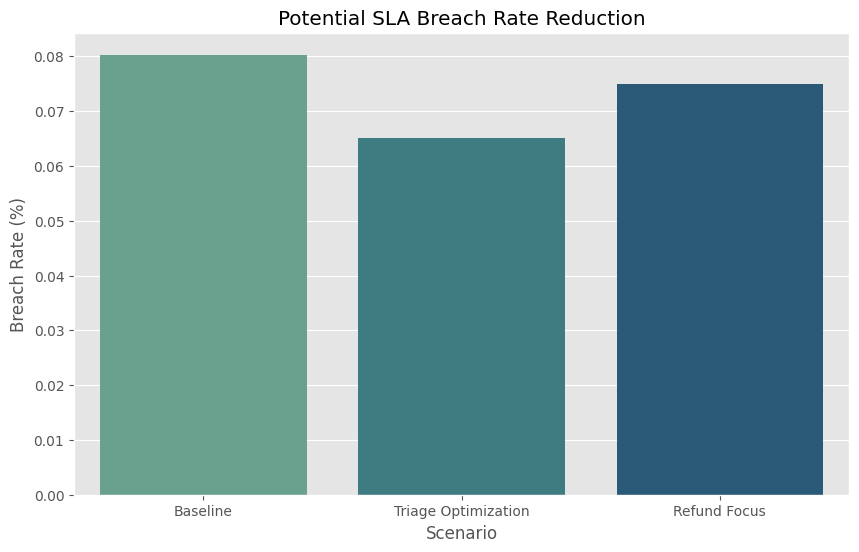

In [5]:
impact_data = pd.DataFrame({
    'Scenario': ['Baseline', 'Triage Optimization', 'Refund Focus'],
    'Breach Rate': [baseline_breach_rate, sim1_breach_rate, sim2_breach_rate]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=impact_data, x='Scenario', y='Breach Rate', palette='crest')
plt.title('Potential SLA Breach Rate Reduction')
plt.ylabel('Breach Rate (%)')
plt.savefig('../outputs/charts/phase_e_optimization_impact.png')
plt.show()